# Working with Cantonese CHILDES Data

[Jackson Lee](https://jacksonllee.com)

May 27, 2022

Demonstration at [the 6th Workshop on Innovations in Cantonese Linguistics (WICL-6)](https://u.osu.edu/wicl/wicl-6/), The Ohio State University.

## Purpose

Demonstrate how recent computational tools (such as [PyCantonese](https://pycantonese.org/)) can be leveraged for more efficient and scalable Cantonese linguistic research, by replicating two recent studies related to Cantonese CHILDES data.

## Loading the Yip-Matthews CHILDES data using PyCantonese

The Cantonese CHILDES dataset I'll be using through this demo is the [Yip-Matthews corpus](https://childes.talkbank.org/access/Biling/YipMatthews.html).

* Cantonese-English bilinguals
* 9 children
* It's huge! (CHAT data files, plus ~35 GB of audio/video files)

**Note:** This demo uses an experimental version of PyCantonese. Certain features (to be noted below when used) are available only on Jackson's computer for now...

In [1]:
# Assumption: your Python environment has pycantonese, pandas, and seaborn available.

import pycantonese

# We'll use these other packages later.
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
yipmatthews = pycantonese.read_chat("https://childes.talkbank.org/data/Biling/YipMatthews.zip")

In [3]:
yipmatthews.info()

501 files
404887 utterances
1979421 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  ------------------------------------
#1                465          2308  YipMatthews/Can/AliciaCan/010310.cha
#2                481          2442  YipMatthews/Can/AliciaCan/010324.cha
#3                532          2701  YipMatthews/Can/AliciaCan/010407.cha
#4                674          3422  YipMatthews/Can/AliciaCan/010421.cha
#5                565          2831  YipMatthews/Can/AliciaCan/010505.cha
...
(set `verbose` to True for all the files)


## Case Study 1: Replicating MLU comparisons in Yip and Matthews (2007)

**Highlights:**

* **Partition data** as needed
* Use built-in functionality for **language development**

One of the areas explored in [Yip and Matthews (2007)]((https://doi.org/10.1017/CBO9780511620744)) is **language dominance** in Cantonese-English bilingual first language acquisitions, measured by the **mean length of utterance (MLU)**.

![sophie-mlu](MLU-in-YipMatthews/sophie-mlu-yipmatthews-2007.jpg)

![alicia-mlu](MLU-in-YipMatthews/alicia-mlu-yipmatthews-2007.jpg)

Let's replicate these MLU comparisions!

From the plots shown, we'll need a couple things:

* **Partition the Yip-Matthews corpus**, so that we can work with the data for one specific child (not all nine of them), as well as for one specific language (not both Cantonese and English together);
* Retrieve the **age** of the target child of a given CHAT file;
* Compute the **MLU** for the target child of a given age (= a CHAT file -- CHILDES organizes the CHAT data files by recording sessions).

First, see how the Yip-Matthews CHAT files are organized in a subdirectory structure:

In [4]:
yipmatthews.info(verbose=True)

501 files
404887 utterances
1979421 words
        Utterance Count    Word Count  File Path
----  -----------------  ------------  ---------------------------------------
#1                  465          2308  YipMatthews/Can/AliciaCan/010310.cha
#2                  481          2442  YipMatthews/Can/AliciaCan/010324.cha
#3                  532          2701  YipMatthews/Can/AliciaCan/010407.cha
#4                  674          3422  YipMatthews/Can/AliciaCan/010421.cha
#5                  565          2831  YipMatthews/Can/AliciaCan/010505.cha
#6                  431          1910  YipMatthews/Can/AliciaCan/010613.cha
#7                  224           839  YipMatthews/Can/AliciaCan/010628.cha
#8                  372          1622  YipMatthews/Can/AliciaCan/010715.cha
#9                  490          2250  YipMatthews/Can/AliciaCan/010730.cha
#10                 202           663  YipMatthews/Can/AliciaCan/010813.cha
#11                 856          2761  YipMatthews/Can/AliciaCan/01091

From the file paths shown above, Sophie's English data is all in the "**SophieEng**" subdirectory, and his Cantonese data in "**SophieCan**".

In [5]:
sophie_can = yipmatthews.filter("SophieCan")

In [6]:
sophie_can.info()

41 files
40418 utterances
189500 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  ------------------------------------
#1                610          2579  YipMatthews/Can/SophieCan/010601.cha
#2               1166          4751  YipMatthews/Can/SophieCan/010614.cha
#3               1061          4124  YipMatthews/Can/SophieCan/010628.cha
#4                883          3230  YipMatthews/Can/SophieCan/010718.cha
#5               1094          4511  YipMatthews/Can/SophieCan/010802.cha
...
(set `verbose` to True for all the files)


To extract the ages and compute the MLU, let's do so in a function, since we'd want a function anyway.

In [7]:
def get_yipmatthews_mlu_df(child):
    # `child` (case-sensitive) from the file paths: Tim, Sophie, Alicia, etc.

    data_cantonese = yipmatthews.filter(f"{child}Can")
    data_english = yipmatthews.filter(f"{child}Eng")

    mlu_cantonese = data_cantonese.mluw()
    mlu_english = data_english.mluw()
    
    ages_cantonese = data_cantonese.ages(months=True)
    ages_english = data_english.ages(months=True)
    
    df = pd.DataFrame({'Age (in months)': ages_cantonese + ages_english,
                       'MLU': mlu_cantonese + mlu_english,
                       'Language': ['Cantonese']*len(mlu_cantonese) + ['English']*len(mlu_english)})

    df = df[df['MLU'] != 0]
    
    return df

In [8]:
df_sophie = get_yipmatthews_mlu_df("Sophie")

In [9]:
df_sophie  # you may output this dataframe as a CSV like df_sophie.to_csv("<some-file-path>")

,Age (in months),MLU,Language
0,18.033333,1.514286,Cantonese
1,18.466667,1.373333,Cantonese
2,18.933333,1.601078,Cantonese
3,19.600000,1.570342,Cantonese
4,20.066667,1.588757,Cantonese
...,...,...,...
78,34.800000,1.964401,English
79,35.166667,1.726688,English
80,35.600000,1.881295,English
81,36.100000,1.989637,English


In [10]:
def visualize_yipmatthews_mlu(child, xlim=None, ylim=None):
    df = get_yipmatthews_mlu_df(child)

    mlu_plot = sns.lmplot(x="Age (in months)", y='MLU', hue='Language', data=df, markers=['o', 'x'], legend=True, height=4, aspect=15/8)
    if xlim:
        mlu_plot.set(xlim=xlim)
    if ylim:
        mlu_plot.set(ylim=ylim)

    # You may also save the plot as an image if desired.
    mlu_plot.savefig('{}-MLU.pdf'.format(child))

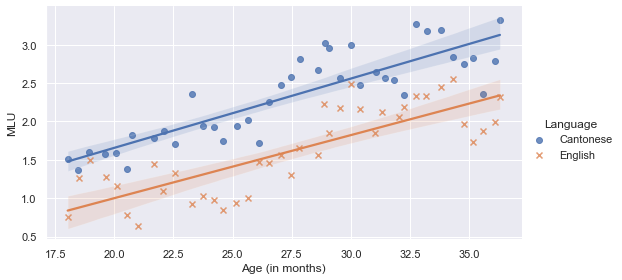

In [11]:
visualize_yipmatthews_mlu("Sophie")

![sophie-mlu](MLU-in-YipMatthews/sophie-mlu-yipmatthews-2007.jpg)

Now that we have the functions ready, why don't we simply apply them to another child's data?

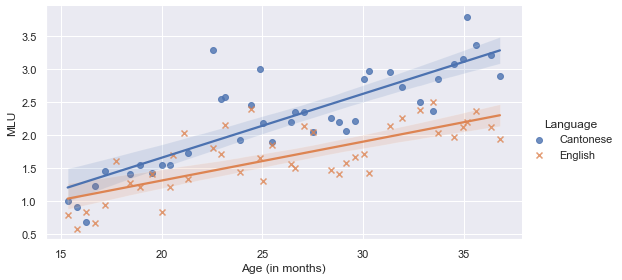

In [12]:
visualize_yipmatthews_mlu("Alicia")

![alicia-mlu](MLU-in-YipMatthews/alicia-mlu-yipmatthews-2007.jpg)

**Question:** How is this approach to computing and plotting MLU better than a more traditional approach? (efficiency, repeatability, etc.)

**Extension:** If you have to build your own data structures from CHILDES data, you have to know how to flexibly traverse through it yourself. Check out this tutorial from last year on [Accessing and Searching Cantonese in PyCantonese](https://github.com/jacksonllee/pycantonese/blob/main/docs/tutorials/lee-pycantonese-2021-05-16.ipynb).

## Case Study 2: Replicating the procedure of Mok and Lee (2018)

**Question:** How would you go about annotating CHILDES data by hand?

**Highlights:**

* Automate the creation of a **CSV for manual annotation work**
* Streamline annotation work that involves **audio/video data**

[Mok and Lee (2018)](https://doi.org/10.1017/S0305000918000260) study **tonal acquisition** of Cantonese-English bilinguals by performing auditory analysis of a portion of the Yip-Matthews CHILDES data. (For comparison with Cantonese monolinguals, specific age ranges were chosen.)

Procedure that we're going to replicate:

> We first extracted the online transcripts of the recordings. A list of all syllables produced by the target child in the sound file in question was compiled. For each syllable, line number (approximate location in the original corpus annotation), the corresponding Chinese character, and the citation tone (extracted from Jyutping transliteration) were specified. Each sound file was listened to independently by two native speakers of Hong Kong Cantonese with phonetic training.

In Mok and Lee's discussion, they also need the distinction of **[left vs medial vs final vs monosyllabic]** for each syllable.

**For manual annotation work preparation:**
* You likely need some sort of a spreadsheet.
* Determine the unit of analysis based on your research -- that's the basis for the rows in your spreadsheet.
* Determine what information is needed to be associated with each data point (e.g., what variables do you need for data analysis later?)
* Create a setup that allows you to generate the spreadsheet as automatically as possible.

To replicate the procedure of Mok and Lee 2018, we're going to create a CSV. Each row should have:

* filename
* line_number (in a given file)
* chinese_character
* position (left, medial, final, or monosyl)
* citation_tone
* **perceived_tone (from manual annotation)**

First, we need the relevant data (using only Charlotte's data for this demo).

In [13]:
yipmatthews.filter("CharlotteCan").info(verbose=True)

19 files
18409 utterances
78128 words
       Utterance Count    Word Count  File Path
---  -----------------  ------------  ---------------------------------------
#1                1221          5093  YipMatthews/Can/CharlotteCan/010828.cha
#2                 881          3119  YipMatthews/Can/CharlotteCan/010912.cha
#3                1104          4491  YipMatthews/Can/CharlotteCan/011009.cha
#4                 936          4212  YipMatthews/Can/CharlotteCan/011105.cha
#5                1030          3870  YipMatthews/Can/CharlotteCan/020025.cha
#6                 740          2818  YipMatthews/Can/CharlotteCan/020122.cha
#7                1107          4601  YipMatthews/Can/CharlotteCan/020206.cha
#8                 973          4017  YipMatthews/Can/CharlotteCan/020218.cha
#9                 990          4088  YipMatthews/Can/CharlotteCan/020317.cha
#10               1227          5011  YipMatthews/Can/CharlotteCan/020420.cha
#11               1119          5108  YipMatthews/Can/Ch

In [14]:
charlotte_cantonese = yipmatthews.filter("CharlotteCan/(020519|020616|020723)")  # by regular expression matching

In [15]:
charlotte_cantonese.info(verbose=True)

3 files
2943 utterances
13620 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  ---------------------------------------
#1               1119          5108  YipMatthews/Can/CharlotteCan/020519.cha
#2                911          3871  YipMatthews/Can/CharlotteCan/020616.cha
#3                913          4641  YipMatthews/Can/CharlotteCan/020723.cha


In [16]:
import csv
from typing import List

from pycantonese.corpus import CHATReader
from pylangacq.objects import Utterance


def create_annotation_csv(corpus: CHATReader, child_in_csv_filename: str) -> List[Utterance]:
    # `child` (case-sensitive) from the file paths: Tim, Sophie, Alicia, etc.

    # Start an empty list. We'll keep track of the utterances to annotate in this list.
    utterances_to_annotate = []

    with open(f"annotations_{child_in_csv_filename}.csv", "w") as csv_file:

        # Start writing the CSV on disk (set the column names, write the header).
        fields = ["filename", "line_number", "chinese_character", "position", "citation_tone", "perceived_tone"]
        csv_writer = csv.DictWriter(csv_file, fieldnames=fields)
        csv_writer.writeheader()

        file_paths = corpus.file_paths()

        # For each file in the data, loop through the utterances inside.
        for file_path, utts_in_file in zip(file_paths, corpus.utterances(by_files=True)):

            # Loop through the utterances. Each utterance now gets a `line_number`.
            for line_number, utt in enumerate(utts_in_file, 1):

                utterance_added = False

                # We want child speech, so ignore child-directed speech.
                if utt.participant != "CHI":
                    continue

                # Loop through the tokens in a given utterance.
                for token in utt.tokens:

                    # Mok and Lee (2018: 7) dropped the sentence-final particles.
                    # Also, no point in dealing with a token without Jyutping (e.g., English, inaudible material).
                    if not token.jyutping or token.pos == "sfp":
                        continue

                    # Now we know for sure we want to annotate this utterance later -- save it for later.
                    if not utterance_added:
                        utterances_to_annotate.append(utt)
                        utterance_added = True

                    # Cantonese CHILDES data represents reduplications like 褲褲 with just fu3 (not fu3fu3)
                    # for Jyutping citation pronunciation. So we need a bit of munging here to make sure
                    # that the number of citation tones extraction is the same as the number of Chinese characters.
                    tones = []
                    for jp in pycantonese.parse_jyutping(token.jyutping):
                        tones.append(jp.tone)
                    while len(tones) < len(token.word):
                        tones.append(tones[-1])

                    # For each (tone, Chinese character) pair, derive the position needed,
                    # then you're ready to construct the CSV row and write it out to the CSV file.
                    for i, (tone, char) in enumerate(zip(tones, token.word)):

                        if i == 0 and (len(token.word) == 1):
                            position = "monosyl"
                        elif i == 0:
                            position = "left"
                        elif i == (len(token.word) -1):
                            position = "final"
                        else:
                            position = "medial"

                        # Depending on your research, you could obtain and/or derive other info and output it as well.

                        row = {
                            "filename": file_path,
                            "line_number": line_number,
                            "chinese_character": char,
                            "position": position,
                            "citation_tone": tone,
                            "perceived_tone": "",
                        }
                        csv_writer.writerow(row)

    return utterances_to_annotate

In [17]:
utterances_to_annotate = create_annotation_csv(charlotte_cantonese, "charlotte")

Now check out the output CSV file.

**Questions:** How *else* would you create a CSV like this? Is your process also easily repeatable for other children's data?

If you're viewing this notebook not live from WICL-6, here's what the CSV looks like:

In [18]:
pd.read_csv("annotations_charlotte.csv")
# perceived_tone is all "NaN", because it's empty in the CSV and is waiting for the human researcher to fill it in from manual annotation.

,filename,line_number,chinese_character,position,citation_tone,perceived_tone
0,YipMatthews/Can/CharlotteCan/020519.cha,10,褲,left,3,NaN
1,YipMatthews/Can/CharlotteCan/020519.cha,10,褲,final,3,NaN
2,YipMatthews/Can/CharlotteCan/020519.cha,17,褲,left,3,NaN
3,YipMatthews/Can/CharlotteCan/020519.cha,17,褲,final,3,NaN
4,YipMatthews/Can/CharlotteCan/020519.cha,20,呀,monosyl,3,NaN
...,...,...,...,...,...,...
573,YipMatthews/Can/CharlotteCan/020723.cha,586,係,monosyl,6,NaN
574,YipMatthews/Can/CharlotteCan/020723.cha,586,係,monosyl,6,NaN
575,YipMatthews/Can/CharlotteCan/020723.cha,773,樹,monosyl,6,NaN
576,YipMatthews/Can/CharlotteCan/020723.cha,859,唔,monosyl,4,NaN


### Time for manual annotations!

**Note:** This section uses an experimental PyCantonese feature for **audio playback per utterance**. This feature is currently only available on Jackson's computer. If/when this feature is released to the public, there's a non-zero chance it may look and/or behave differently.

The CHILDES website has the "Browsable transcipts", but naturally the interface is designed to view all utterances in a given CHAT file, and you can't customize for exactly what you want to see. If you're working in a more programmable fashion, recall that we've kept the utterances to annotate at the list `utterances_to_annotate`.

In [19]:
len(utterances_to_annotate)

295

Running the following cell gives you a view of just these utterances, each with its audio playback button to facilitate your manual annotation work.

In [20]:
from IPython.display import display, HTML

# Showing just the first 10 utterances in this demo notebook
for u in utterances_to_annotate[:10]:
    display(HTML(u._repr_html_()))

*CHI:,pretty,呀,.
%mor:,adv|,co|aa3,.
%gra:,1|2|JCT,2|0|INCROOT,3|2|PUNCT


*CHI:,apple,呀,.
%mor:,n|,co|aa3,.
%gra:,1|0|INCROOT,2|1|COM,3|1|PUNCT


*CHI:,iron,呀,.
%mor:,n|,co|aa3,.
%gra:,1|0|INCROOT,2|1|COM,3|1|PUNCT


*CHI:,iron,呀,.
%mor:,n|,co|aa3,.
%gra:,1|0|INCROOT,2|1|COM,3|1|PUNCT


*CHI:,煲,呀,.
%mor:,n|bou1=pot,sfp|aa3,.


*CHI:,飛機,.
%mor:,n|fei1gei1=plane,.


*CHI:,係,sticker,.
%mor:,v|hai6=be,L2|,.


## Resources

* [Tutorials](https://github.com/EdUHK-LML/school-of-cantonese-studies-2021/tree/main/Session-3) from the School of Cantonese Studies 2021 at EdUHK
* [Facebook page](https://www.facebook.com/pycantonese) for PyCantonese
* Technical training and consulting available -- please reach out to Jackson